In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import theano
import exoplanet as xo
import pymc3 as pm
import theano.tensor as tt
from scipy.signal import savgol_filter
import corner

In [2]:
import xoflares
from flarefinder import *

In [3]:
print(xo.__version__)
print(theano.__version__)
print(pm.__version__)


0.1.5
1.0.4
3.5


In [4]:
l = Lightcurve()
l.add_data('AU Mic')
#l.add_data(curve='https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2018206045859-s0001-0000000441420236-0120-s_tp.fits')

In [5]:
o = OddsRatioDetector(l)
lnO, ts = o.oddsratio()
flarelist, Nflares, maxlist = o.thresholder(lnO, thresh = 1, expand=0, returnmax=True)

In [6]:
print(flarelist)

[(186, 242), (405, 474), (608, 642), (723, 799), (837, 886), (951, 1062), (1116, 1176), (1338, 1406), (1498, 1548), (1783, 1893), (1985, 2023), (2056, 2095), (2214, 2322), (2385, 2460), (2516, 2528), (2623, 2706), (2815, 2929), (3184, 3185), (3336, 3491), (3547, 3656), (3692, 3709), (3801, 3864), (3891, 3925), (4227, 4315), (4522, 4564), (4890, 4905), (4961, 5035), (5083, 5085), (5212, 5282), (5345, 5346), (5439, 5488), (5654, 5671), (5810, 5847), (5923, 6028), (6084, 6198), (6299, 6342), (6477, 6516), (6611, 6612), (6614, 6719), (6779, 6891), (6936, 7038), (7102, 7137), (7180, 7260), (7324, 7342), (7556, 7641), (7776, 7902), (8097, 8216), (8284, 8319), (8475, 8515), (8739, 8750), (8799, 8844), (8986, 9071), (9103, 9235), (9278, 9420), (9809, 9892), (10161, 10186), (10429, 10470), (10623, 10660), (10857, 10858), (10859, 10891), (10927, 10990), (11071, 11183), (11307, 11348), (11465, 11519), (11813, 11845), (11936, 11997), (12093, 12145), (12243, 12290), (12443, 12494), (12656, 12714), 

In [7]:
l.time /=(24*3600)


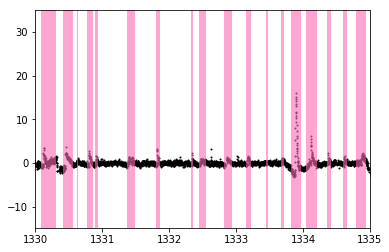

In [8]:
for i in flarelist:
    plt.axvspan(l.time[i[0]], l.time[i[1]], facecolor='hotpink', alpha = .6)

# plt.xlim(l.time.min,l.time.max)   
#plt.ylim(-.0001,.0001)
plt.xlim(1330,1335)   
plt.scatter(l.time, l.flux,s=1,c='k')

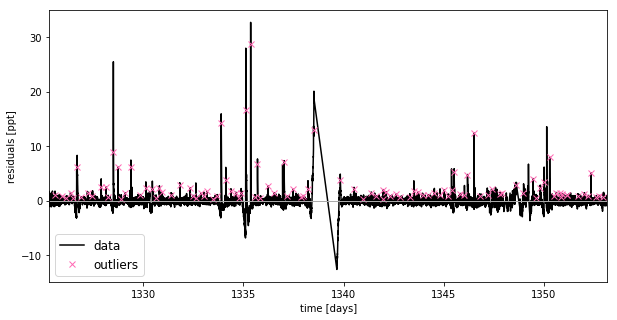

In [9]:
tpeaks = []
amp = []

for i in range(len(maxlist)):
#     print(maxlist[i][1])
    tpeaks.append(maxlist[i][1])

for i in range(len(maxlist)):
#     print(maxlist[i][1])
    amp.append((maxlist[i][0])/1000)


plt.figure(figsize=(10, 5))
plt.plot(l.time, l.flux, "k", label="data")
plt.plot(l.time[tpeaks], l.flux[tpeaks], "x", color = "hotpink", label="outliers")
plt.axhline(0, color="#aaaaaa", lw=1)
plt.ylabel("residuals [ppt]")
plt.xlabel("time [days]")
plt.legend(fontsize=12, loc=3)
#plt.xlim(1330,1335)
plt.xlim(l.time.min(), l.time.max());    

In [10]:
#l.flux = (l.flux - 1.0)  * 1e3
# l.time = l.time/24*3600
### don't know what this is
# texp = lcf.hdu[1].header['FRAMETIM'] * lcf.hdu[1].header["NUM_FRM"]
# texp /= 60.0 * 60.0 * 24.0
texp = 0.001388888888888889
ref_time = 0.5 * (l.time.min() + l.time.max())
print(ref_time)

#lc.plot(normalize=False, ylabel='Relative flux [ppt]')

1339.2344983518328


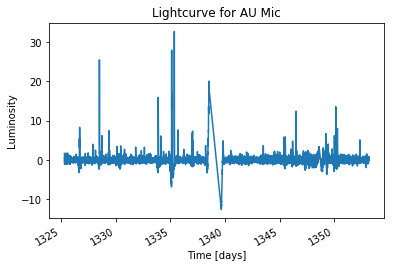

In [11]:
fig, ax = plt.subplots(1)
plt.title('Lightcurve for AU Mic')
ax.plot(l.time, l.flux)
fig.autofmt_xdate()
plt.xlabel('Time [days]')
plt.ylabel('Luminosity')
plt.show()

In [12]:
# find some flares
# mflare = l.flux < 3.5 * np.sqrt(np.mean(l.flux**2))
# print(mflare)

cads = l.cadenceno - l.cadenceno[0]
x = l.time - ref_time
y = l.flux #  we're working with the data with a savgol subtracted


#print(flarelist[0])
#number of points within each flare, get this from flarelist!
npts = []#np.array([])

for i in range(len(flarelist)):
#     print(flarelist[i])
    k = flarelist[i][1] - flarelist[i][0]
    npts.append(k)


# i = 0
# n = 1
# while True:
#     try:
#         if fidx[i + 1] == fidx[i] + n:
#             fidx = np.delete(fidx, i + 1)
#             n += 1
#         else:
#             npts = np.r_[npts, n+1]
#             i += 1
#             n = 1
#     except IndexError:
#         npts = np.r_[npts, n+1]
#         break
        
        
tpeaks
ampls = amp
fwhms = np.asarray(npts) * (2/1440)
npeaks = Nflares


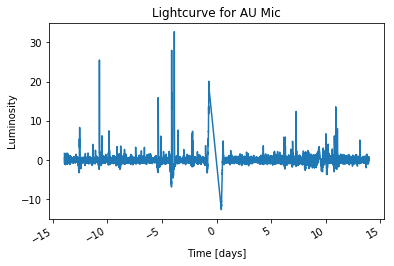

In [50]:
fig, ax = plt.subplots(1)
plt.title('Lightcurve for AU Mic')
ax.plot(x, l.flux)
fig.autofmt_xdate()
plt.xlabel('Time [days]')
plt.ylabel('Luminosity')
plt.show()

In [14]:
# fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks])
# axes = axes.flatten()
# for i in range(npeaks):
#     ax = axes[i]
#     ax.plot(x, y)
#     ax.axvline(tpeaks[i], np.min(y), np.max(y), color='r', linestyle=':')
#     ax.set_xlim(tpeaks[i]-0.2, tpeaks[i]+0.2)
#     ax.set_ylim(np.min(y), np.max(ampls[i]+3))

Text(0, 0.5, 'power')

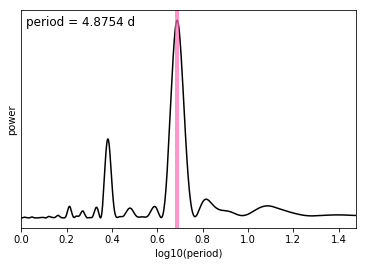

In [15]:
# determine the rotation period of the star
y = (l.raw_flux-1)*1e3
yerr = l.flux_error * 1e3

results = xo.estimators.lomb_scargle_estimator(
    x, y, max_peaks=1, min_period=1.0, max_period=30.0,
    samples_per_peak=50)

peak = results["peaks"][0]
ls_period = peak["period"]
freq, power = results["periodogram"]
plt.plot(-np.log10(freq), power, "k")
plt.axvline(np.log10(ls_period), color="hotpink", lw=4, alpha=0.7)
plt.xlim((-np.log10(freq)).min(), (-np.log10(freq)).max())
plt.annotate("period = {0:.4f} d".format(ls_period),
             (0, 1), xycoords="axes fraction",
             xytext=(5, -5), textcoords="offset points",
             va="top", ha="left", fontsize=12)
plt.yticks([])
plt.xlabel("log10(period)")
plt.ylabel("power")

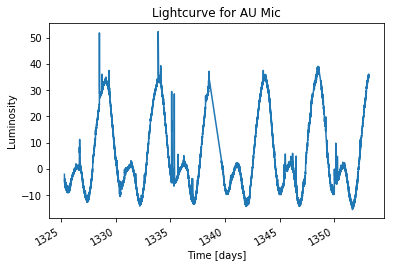

In [16]:
fig, ax = plt.subplots(1)
plt.title('Lightcurve for AU Mic')
ax.plot(l.time, y)
fig.autofmt_xdate()
plt.xlabel('Time [days]')
plt.ylabel('Luminosity')
plt.show()

In [17]:
### need to feed in flare times!!!
### does this mask flares?
### what is npeaks?
### this includes flares

# GP model for smoothing using above period
def build_model(mask=None, start=None):
    if mask is None:
        mask = np.ones_like(x, dtype=bool)
    with pm.Model() as model:

        # The mean flux of the time series
        mean = pm.Normal("mean", mu=0, sd=15.0)

        # A jitter term describing excess white noise
        logs2 = pm.Normal("logs2", mu=2*np.log(np.min(yerr[mask])), sd=5.0)

        # A SHO term to capture long term trends
        logS = pm.Normal("logS", mu=0.0, sd=15.0, testval=np.log(np.var(y[mask])))
        logw = pm.Normal("logw", mu=np.log(2*np.pi/10.0), sd=10.0)
        term1 = xo.gp.terms.SHOTerm(log_S0=logS, log_w0=logw, Q=1/np.sqrt(2))
        
        # The parameters of the RotationTerm kernel
        logamp = pm.Normal("logamp", mu=np.log(np.var(y[mask])), sd=5.0)
        logperiod = pm.Normal("logperiod", mu=np.log(ls_period), sd=0.2)
        period = pm.Deterministic("period", tt.exp(logperiod))
        logQ0 = pm.Normal("logQ0", mu=1.0, sd=10.0)
        logdeltaQ = pm.Normal("logdeltaQ", mu=2.0, sd=10.0)
        mix = pm.Uniform("mix", lower=0, upper=1.0)
        term2 = xo.gp.terms.RotationTerm(
            log_amp=logamp,
            period=period,
            log_Q0=logQ0,
            log_deltaQ=logdeltaQ,
            mix=mix
        )

        tpeak = pm.Normal("tpeak", mu=tpeaks, sd=np.ones_like(tpeaks) * 0.003,
                      testval=tpeaks, shape=npeaks)
        logFwhm = pm.Normal("logFwhm", mu=np.log(fwhms), sd=1.0, testval=np.log(fwhms),
                        shape=npeaks)
        logAmpl = pm.Normal("logAmpl", mu=np.log(ampls), sd=1.0, testval=np.log(ampls),
                        shape=npeaks)
        fwhm = pm.Deterministic("fwhm", tt.exp(logFwhm))
        ampl = pm.Deterministic("ampl", tt.exp(logAmpl))
        
        light_curve = xoflares.get_light_curve(x[mask], tpeak, fwhm, ampl, texp=texp, oversample=9)
        pm.Deterministic("light_curve", light_curve)
        model.light_curves = light_curve

        # Set up the Gaussian Process model
        kernel = term1 + term2
        gp = xo.gp.GP(kernel, x[mask], yerr[mask]**2 + tt.exp(logs2), J=6)

        # Compute the Gaussian Process likelihood and add it into the
        # the PyMC3 model as a "potential"
        pm.Potential("loglike", gp.log_likelihood(y[mask] - mean - light_curve))

        # Compute the mean model prediction for plotting purposes
        pm.Deterministic("pred", gp.predict())

        # Optimize to find the maximum a posteriori parameters
        if start is None:
            start = model.test_point
        map_soln = xo.optimize(start=start, vars=[mean, logs2])
        map_soln = xo.optimize(start=map_soln, vars=[mean, logs2, logS, logw])
        map_soln = xo.optimize(start=map_soln, vars=[fwhm, mean])
        map_soln = xo.optimize(start=map_soln, vars=[ampl, mean])
        map_soln = xo.optimize(start=map_soln, vars=[fwhm, ampl])
        map_soln = xo.optimize(start=map_soln, vars=[tpeak])
        map_soln = xo.optimize(start=map_soln, vars=[mean, logs2, logamp, logQ0, logdeltaQ, mix])
        map_soln = xo.optimize(start=map_soln, vars=[mean, logs2])
        map_soln = xo.optimize(start=map_soln, vars=[mean, logs2, logS, logw])
        map_soln = xo.optimize(start=map_soln, vars=[fwhm, mean])
        map_soln = xo.optimize(start=map_soln, vars=[ampl, mean])
        map_soln = xo.optimize(start=map_soln, vars=[fwhm, ampl])
        map_soln = xo.optimize(start=map_soln, vars=[tpeak])
        map_soln = xo.optimize(start=map_soln, vars=[tpeak,fwhm, ampl])
    return model, map_soln

model0, map_soln0 = build_model()

/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

optimizing logp for variables: ['logs2', 'mean']


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]

message: Optimization terminated successfully.
logp: -82327.95964840536 -> -26949.338108245272
optimizing logp for variables: ['logw', 'logS', 'logs2', 'mean']


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]

message: Desired error not necessarily achieved due to precision loss.
logp: -26949.338108245272 -> -16852.255881368248


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]

optimizing logp for variables: ['mean', 'logFwhm']


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


message: Optimization terminated successfully.
logp: -16852.255881368248 -> -16852.255881368248
optimizing logp for variables: ['mean', 'logAmpl']


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


message: Optimization terminated successfully.
logp: -16852.255881368248 -> -16852.255881368248
optimizing logp for variables: ['logAmpl', 'logFwhm']


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


message: Optimization terminated successfully.
logp: -16852.255881368248 -> -16852.255881368248


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


optimizing logp for variables: ['tpeak']


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


message: Optimization terminated successfully.
logp: -16852.255881368248 -> -16852.255881368248
optimizing logp for variables: ['mix_interval__', 'logdeltaQ', 'logQ0', 'logamp', 'logs2', 'mean']


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


message: Optimization terminated successfully.
logp: -16852.255881368248 -> -16814.325172827783
optimizing logp for variables: ['logs2', 'mean']
message: Optimization terminated successfully.
logp: -16814.325172827783 -> -16814.325172827783
optimizing logp for variables: ['logw', 'logS', 'logs2', 'mean']
message: Optimization terminated successfully.
logp: -16814.325172827783 -> -16785.838412205292
optimizing logp for variables: ['mean', 'logFwhm']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['mean', 'logAmpl']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['logAmpl', 'logFwhm']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['tpeak']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp f

/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292


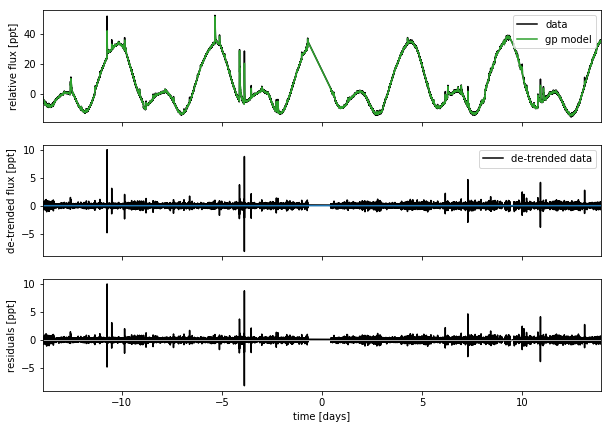

In [18]:
# plot the results of the model fitting + smoothing

def plot_light_curve(model, soln, mask=None):
    if mask is None:
        mask = np.ones(len(x), dtype=bool)

    fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

    ax = axes[0]
    ax.plot(x[mask], y[mask], "k", label="data")
    gp_mod = xo.utils.eval_in_model(model.pred, soln, model=model)
    gp_mod += soln["mean"]
    ax.plot(x[mask], gp_mod, color="C2", label="gp model")
    ax.legend(fontsize=10)
    ax.set_ylabel("relative flux [ppt]")

    ax = axes[1]
    ax.plot(x[mask], y[mask] - gp_mod, "k", label="de-trended data")
    light_curve = xo.utils.eval_in_model(model.light_curves, soln, model=model)

    mod = light_curve
    ax.plot(x[mask], mod,)
    ax.legend(fontsize=10)
    ax.set_ylabel("de-trended flux [ppt]")

    ax = axes[2]
    mod = gp_mod + light_curve
    ax.plot(x[mask], y[mask] - mod, "k")
    ax.axhline(0, color="#aaaaaa", lw=1)
    ax.set_ylabel("residuals [ppt]")
    ax.set_xlim(x[mask].min(), x[mask].max())
    ax.set_xlabel("time [days]")
    
    return fig
    
plot_light_curve(model0, map_soln0);

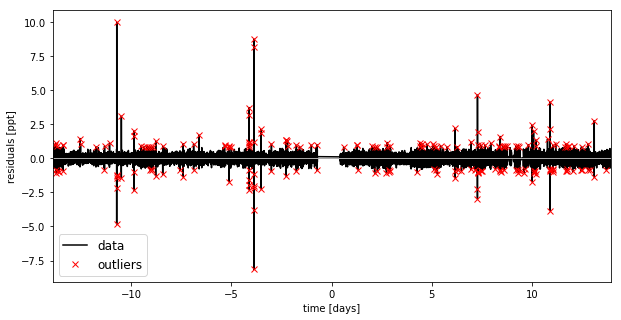

In [19]:
# subtract off the model to get residual (flatten light curve w/ spots/rotation removed)

mod = map_soln0["pred"] + map_soln0["mean"] + map_soln0["light_curve"]
resid = y - mod
rms = np.sqrt(np.median(resid**2))
mask = np.abs(resid) < 5 * rms

plt.figure(figsize=(10, 5))
plt.plot(x, resid, "k", label="data")
plt.plot(x[~mask], resid[~mask], "xr", label="outliers")
plt.axhline(0, color="#aaaaaa", lw=1)
plt.ylabel("residuals [ppt]")
plt.xlabel("time [days]")
plt.legend(fontsize=12, loc=3)
plt.xlim(x.min(), x.max());

optimizing logp for variables: ['logs2', 'mean']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['logw', 'logS', 'logs2', 'mean']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['mean', 'logFwhm']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['mean', 'logAmpl']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['logAmpl', 'logFwhm']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['tpeak']
message: Optimization terminated successfully.
logp: -16785.838412205292 -> -16785.838412205292
optimizing logp for variables: ['mix_interval__', 'logdeltaQ', 'logQ0', 'logamp', 'logs2', 'mean']
message: Optim

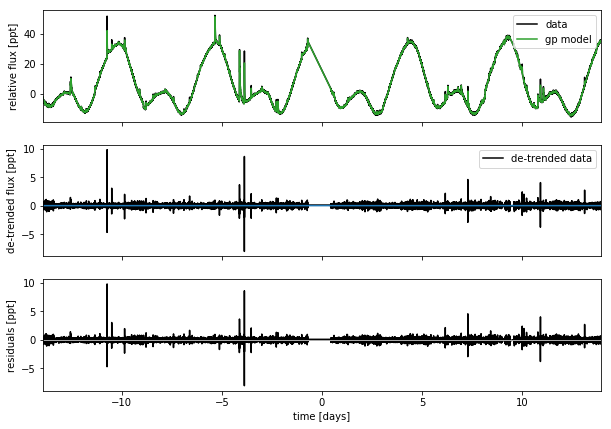

In [20]:

model, map_soln1 = build_model(mask=None, start=map_soln0)
fig = plot_light_curve(model, map_soln1, mask=None)

In [21]:
with model:
    map_soln2 = xo.optimize(start=map_soln1,)


optimizing logp for variables: ['logAmpl', 'logFwhm', 'tpeak', 'mix_interval__', 'logdeltaQ', 'logQ0', 'logperiod', 'logamp', 'logw', 'logS', 'logs2', 'mean']


/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


message: Optimization terminated successfully.
logp: -16761.7226589996 -> -16745.902157087097


In [22]:
with model:
    mean_field = pm.fit(method='advi', start=map_soln2,  n=100000)

  0%|          | 0/100000 [00:00<?, ?it/s]/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
Average Loss = 17,086: 100%|██████████| 100000/100000 [12:34:24<00:00,  2.11it/s]      
Finished [100%]: Average Loss = 17,086


In [23]:
with model:
    trace = mean_field.sample(3000)

/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/emilygilbert/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Prot = 4.8857433100460845 +0.04223066716631685 - 0.040758499156273054


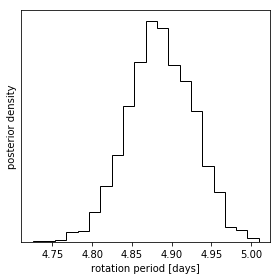

In [24]:
fig, axes = plt.subplots(1,1, figsize=[4, 4])
ax = axes
ax.hist( trace['period'], bins=20, histtype='step', color="k")
plt.yticks([])

ax.set_xlabel("rotation period [days]")
ax.set_ylabel("posterior density");

plt.tight_layout()
fig.savefig('aumic-rotation.png', dpi=200)
q = np.percentile(trace['period'], [16,50,84])
print('Prot = {} +{} - {}'.format(q[1], q[2] - q[1], q[1]-q[0]))


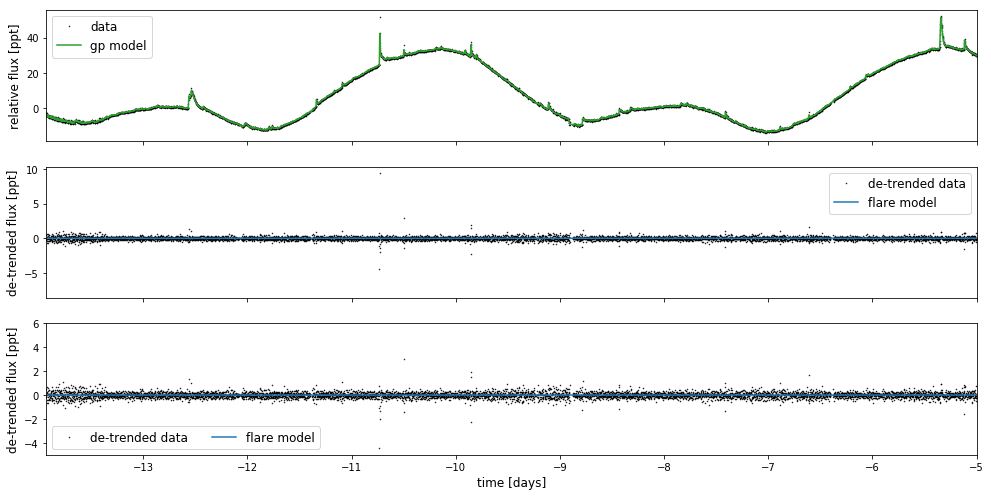

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(14, 7), sharex=True)

ax = axes[0]
ax.plot(x, y, ".k", label="data", ms=1)
gp_mod = np.median(trace['pred'], axis=0)
gp_mod += np.median(trace["mean"])
ax.plot(x, gp_mod, color="C2", label="gp model")
ax.legend(fontsize=12)
ax.set_ylabel("relative flux [ppt]", fontsize=12)

ax = axes[1]
ax.plot(x, y - gp_mod, ".k", label="de-trended data", ms=1)
light_curve = np.median(trace['light_curve'], axis=0)

mod = light_curve
ax.plot(x, mod, label='flare model')
ax.legend(fontsize=12)
ax.set_ylabel("de-trended flux [ppt]", fontsize=12)

ax = axes[2]
# mod = gp_mod + light_curve
# ax.plot(x, y - mod, "k")
# ax.axhline(0, color="#aaaaaa", lw=1)
# ax.set_ylabel("residuals [ppt]", fontsize=12)
ax.plot(x, y - gp_mod, ".k", label="de-trended data", ms=1)
ax.plot(x, mod, label='flare model')

ax.legend(fontsize=12, loc=3, ncol=2)
ax.set_ylabel("de-trended flux [ppt]", fontsize=12)
ax.set_ylim(-5,6)

ax.set_xlim(x.min(), -5)
ax.set_xlabel("time [days]", fontsize=12)

plt.tight_layout()

In [55]:
tpeaks = tpeaks + ref_time

print(tpeaks)
print(x)
print(y)

[  199.   451.   615.   764.   869.  1004.  1141.  1360.  1509.  1818.
  1997.  2068.  2254.  2421.  2522.  2672.  2868.  3184.  3362.  3571.
  3701.  3824.  3901.  4246.  4539.  4895.  4983.  5083.  5238.  5345.
  5454.  5660.  5828.  5972.  6132.  6315.  6486.  6611.  6685.  6819.
  6979.  7119.  7221.  7324.  7601.  7824.  8174.  8292.  8487.  8739.
  8815.  9004.  9206.  9349.  9842. 10164. 10445. 10628. 10857. 10871.
 10968. 11105. 11333. 11481. 11817. 11960. 12114. 12271. 12462. 12674.
 12876. 13018. 13163. 13292. 13387. 13608. 13753. 13866. 14104. 14303.
 14589. 14705. 14910. 14977. 15225. 15300. 15472. 15563. 15717. 15854.
 16055. 16193. 16274. 16409. 16473. 16501. 16675. 16681. 17049. 17266.
 17410. 17507. 17693. 17807. 17936.]
[-13.93307375 -13.93168486 -13.93029597 ...  13.93029608  13.93168491
  13.93307375]
[-2.1020174  -3.38900089 -3.76814604 ... 35.96365452 35.81237793
 35.13884544]


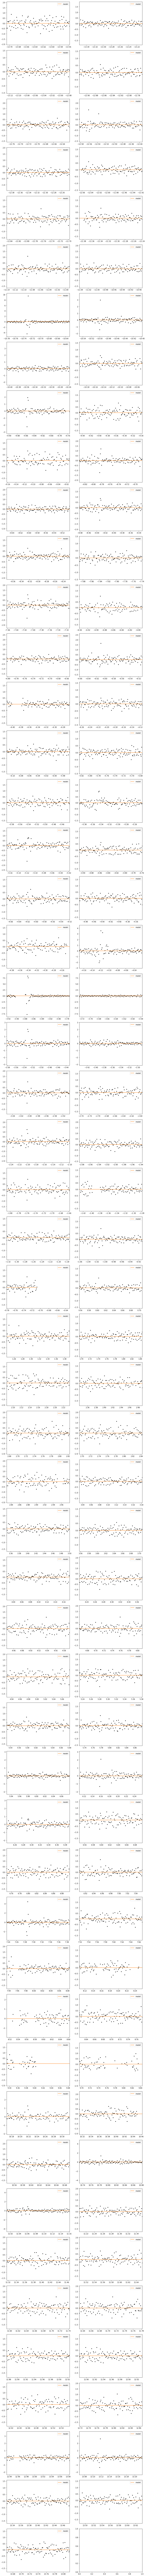

In [62]:
tpeaks
y = np.asarray(y)
flc =  np.percentile(trace['light_curve'], [16, 50, 84], axis=0)
fig, axes = plt.subplots(ncols=2, nrows=np.ceil(npeaks/2).astype(int), figsize=[12,npeaks*2])
axes = axes.flatten()
for i in range(npeaks):
    timemask = (x >= (x[int(tpeaks[i])]-0.2)) * ((x < x[int(tpeaks[i])]+0.2))
    ax = axes[i]
    ax.plot(x[timemask], y[timemask]-gp_mod[timemask], '.k')
    ax.plot(x[timemask], flc[1][timemask], color="C1", label="model")
    art = ax.fill_between(x[timemask], flc[0][timemask],
                          flc[2][timemask], color="C1", alpha=0.3,
                               zorder=1000)
    art.set_edgecolor("none")
    ax.set_xlim(x[int(tpeaks[i])]-0.05, x[int(tpeaks[i])]+0.1)
    ax.set_ylim(np.min(y[timemask]-gp_mod[timemask]) - 1, 1 + np.max(y[timemask]-gp_mod[timemask]))
    ax.legend()
    
fig.tight_layout()